In [2]:
from os.path import join
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import data_utils
import viz_utils
import model_utils

wd = join("..", "data")

# Histogram of oceans

In [27]:
datasets = pd.read_csv(join(wd, 'csvs', 'current_datasets.csv'))

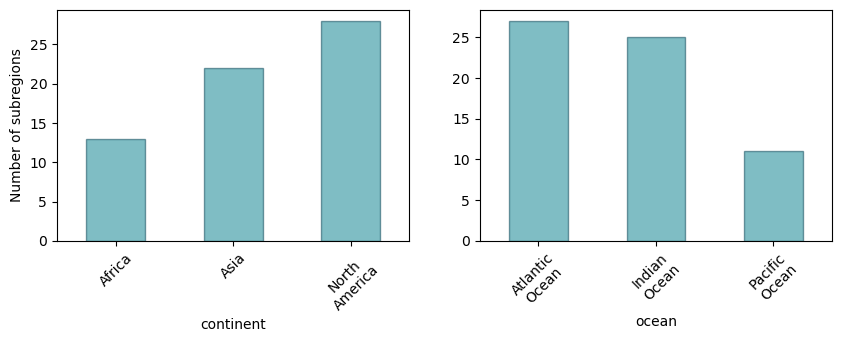

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

datasets.groupby('continent')['nsubregions'].sum().plot(kind='bar', alpha=0.5, edgecolor='#003E51', color='#007D8A', ax=ax[0])
datasets.groupby('ocean')['nsubregions'].sum().plot(kind='bar', alpha=0.5, edgecolor='#003E51', color='#007D8A', ax=ax[1])

ax[0].set_ylabel('Number of subregions');
ax[0].set_xticklabels(['Africa', 'Asia', 'North\nAmerica'], rotation=45, ha='center');
ax[1].set_xticklabels(['Atlantic\nOcean', 'Indian\nOcean', 'Pacific\nOcean'], rotation=45, ha='center');

# Geographic heatmap
Instructions [here](https://alcidanalytics.com/p/geographic-heatmap-in-python).

In [40]:
gdf = model_utils.load_spatial_data(wd)
gdf_centroid = gdf.set_geometry(gdf.centroid)

In [42]:
import geoplot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [62]:
gdf_events = gdf.dissolve(by='event')
gdf_events_centroid = gdf_events.set_geometry(gdf_events.centroid)

In [66]:
gdf_events_centroid = gdf_events.set_geometry(gdf_events.centroid)

/var/folders/73/5jj08bt51kz8nf9ndh06v_r80000gq/T/ipykernel_8768/2931871262.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_events_centroid = gdf_events.set_geometry(gdf_events.centroid)


AttributeError: 'AxesSubplot' object has no attribute 'set_extent'

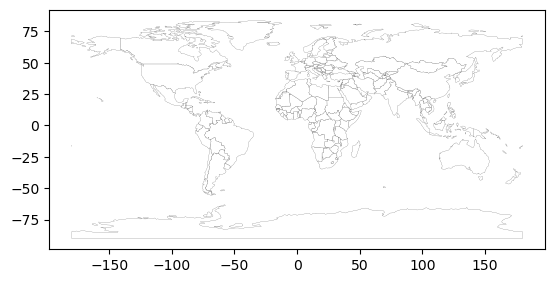

In [85]:
ax = world.plot(color='white', edgecolor='black', linewidth=0.1) # geoplot.polyplot(world)
geoplot.kdeplot(gdf_events_centroid, cmap='Reds', fill=True, ax=ax, n_levels=100, alpha=0.8,
               projection=geoplot.crs.AlbersEqualArea())
# gdf_events.plot(ax=ax, color='turquoise')

<GeoAxesSubplot: >

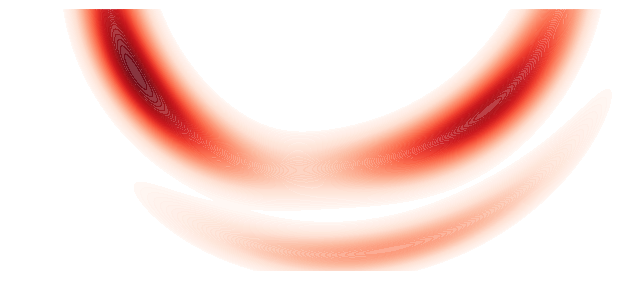

In [89]:
geoplot.kdeplot(gdf_events_centroid, cmap='Reds', fill=True, n_levels=100, alpha=0.8,
               projection=geoplot.crs.AlbersEqualArea())

In [93]:
import folium
from folium.plugins import heat_map

In [106]:
gdf_events_centroid.unary_union.centroid.y

14.596811290368743

In [108]:
help(heat_map)

Help on module folium.plugins.heat_map in folium.plugins:

NAME
    folium.plugins.heat_map

CLASSES
    folium.elements.JSCSSMixin(branca.element.Element)
        HeatMap(folium.elements.JSCSSMixin, folium.map.Layer)
    folium.map.Layer(branca.element.MacroElement)
        HeatMap(folium.elements.JSCSSMixin, folium.map.Layer)
    
    class HeatMap(folium.elements.JSCSSMixin, folium.map.Layer)
     |  HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, radius=25, blur=15, gradient=None, overlay=True, control=True, show=True, **kwargs)
     |  
     |  Create a Heatmap layer
     |  
     |  Parameters
     |  ----------
     |  data : list of points of the form [lat, lng] or [lat, lng, weight]
     |      The points you want to plot.
     |      You can also provide a numpy.array of shape (n,2) or (n,3).
     |  name : string, default None
     |      The name of the Layer, as it will appear in LayerControls.
     |  min_opacity  : default 1.
     |      The minimum opacity the he

In [112]:
# for_map = pd.read_csv('campaign_contributions_for_map.tsv', sep='\t')

# max_amount = float(for_map['Amount'].max())

hmap = folium.Map(location=[gdf_events_centroid.unary_union.centroid.y, gdf_events_centroid.unary_union.centroid.x],
                  zoom_start=1)

hm_wide = heat_map.HeatMap( list(zip(gdf_events_centroid.geometry.y, gdf_events_centroid.geometry.x)),
                   min_opacity=0.2,
                   # max_val=max_amount,
                   radius=17,
                   blur=15, 
                   max_zoom=1, 
                 )

# folium.GeoJson(district23).add_to(hmap)
hmap.add_child(hm_wide)

In [113]:
img_data = hmap.to_png(5)

AttributeError: 'Map' object has no attribute 'to_png'

In [114]:
help(hmap)

Help on Map in module folium.folium object:

class Map(folium.elements.JSCSSMixin, branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Mus